In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as DT
%matplotlib inline
import os

In [2]:
dirpath ='/Users/abhinay/Documents/cs/projects/fantasy-hockey-analytics/standings-snapshot-analysis/data-files'
list_files = os.listdir(dirpath) # dir is your directory path
number_files = len(list_files)

In [3]:
datelist = pd.date_range("2017-10-17", periods=number_files-1).tolist()
dates = list((dobj.date().strftime('%Y-%m-%d') for dobj in datelist))
stats = pd.DataFrame()

In [4]:
for date in dates:
    path ='~/Documents/cs/projects/fantasy-hockey-analytics/standings-snapshot-analysis/data-files/{}.csv'.format(date)
    frame = pd.read_csv(path)
    # Renaming the columns for clarity
    frame.rename(columns={'GP*.1': 'GoalieGP', 'GP*': 'PlayerGP'}, inplace=True)
    frame['date'] = date
    stats = pd.concat([stats, frame], ignore_index=True)

In [5]:
PlayerAssits = pd.DataFrame()
for name in stats['Team Name'].unique():
    df = stats[stats['Team Name']== name][['date','A']]
    df.set_index(df['date'], inplace=True)
    df.drop('date', axis=1, inplace=True)
    df.rename(columns={'A':name}, inplace=True)
    PlayerAssits=pd.concat([PlayerAssits, df], axis=1)

PlayerAssits

,/u/BuffaloSobbers1,/u/xskilledsnipax,/u/Hotwired38,/u/canadaq,/u/crayfishparty2,/u/joey3140,/u/TheManagement,/u/Dangled0re,/u/xprmnts,/u/acegfx,/u/scomar201,/u/rjupp24,/u/flykessel,Huge's Real Gud Pros,/u/mcgrevin,/u/phoninghome,/u/Truxa,/u/idrisk2000,u/ctrl_alt_karma,/u/ninjaemperor
date,,,,,,,,,,,,,,,,,,,,
2017-10-17,21,40,42,30,39,47,25,27,40,28,31,42,29,22,30,37,27,29,20,25
2017-10-18,28,44,51,35,43,51,28,31,41,29,37,45,33,25,37,42,32,36,25,30
2017-10-19,28,44,53,37,43,52,28,36,43,31,39,46,33,26,39,42,34,36,26,30
2017-10-20,29,47,58,40,47,58,28,38,43,36,43,50,33,28,44,42,36,47,27,33


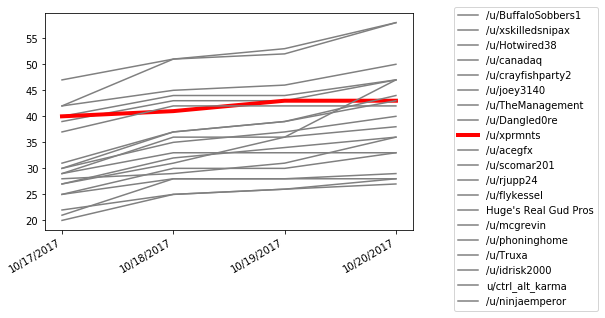

In [6]:
x = [DT.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
for name in PlayerAssits.columns:
    if name == '/u/xprmnts':
        plt.plot(x,PlayerAssits[name],'r-',lw=4,)
    else:
        plt.plot(x,PlayerAssits[name],'grey')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.gcf().autofmt_xdate()
plt.tight_layout()
